### Group Members:

1. Hitesh Chauhan

2. Yevonnael Andrew


### Lending Club Case Study 

In [71]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Understanding -- Private loan data taken for the period 2007 to 2011


### EDA

In [2]:
loans = pd.read_csv('loan.csv',encoding = "ISO-8859-1")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loans.shape

(39717, 111)

### Calculate Null Values 

In [4]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Calculate Null % 

In [5]:
per_cal = round(100*(loans.isnull().sum()/len(loans.id)), 2)
per_cal.loc[per_cal > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

### Drop Colums with higest number of missing values 

In [6]:
drop_coumns = list(per_cal.loc[per_cal >= 50].index)
drop_coumns.append('desc')
loans = loans.drop(drop_coumns,axis=1)


In [7]:
loans = loans[~ loans['emp_title'].isnull()]
loans = loans[~ loans['emp_length'].isnull()]


### Calculate Null % again to reconfirm

In [8]:
per_cal = round(100*(loans.isnull().sum()/len(loans.id)), 2)
per_cal.loc[per_cal > 0]

title                         0.02
revol_util                    0.12
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

### Drop null 


In [9]:
loans = loans[~ loans['pub_rec_bankruptcies'].isnull()]
loans = loans[~ loans['title'].isnull()]
loans = loans[~ loans['revol_util'].isnull()]
loans = loans[~ loans['last_pymnt_d'].isnull()]


In [10]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
loans.shape


(36433, 53)

### Drop unused columns and duplicates

In [12]:
unused_colimns = ['chargeoff_within_12_mths','tax_liens','collections_12_mths_ex_med','policy_code','delinq_amnt','acc_now_delinq','funded_amnt_inv','zip_code','funded_amnt','initial_list_status']
loans = loans.drop(unused_colimns ,axis =1)


In [13]:
loans = loans.drop_duplicates()

In [14]:
loans.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0
5,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,0.0
6,1069639,1304742,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL,0.0


In [15]:
loans.shape

(36433, 43)

### Cleaning Data 

In [16]:
# Getting columns 

loans.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
loans.int_rate = loans.int_rate.apply(lambda x : x.replace('%','')).astype('float') # % replace with ''
loans.term = loans.term.apply(lambda x : x.replace('months','')) # month replace with ''

loans.last_pymnt_d = pd.to_datetime(loans.last_pymnt_d, format='%b-%y') # date formatted
loans['last_pymnt_d_year'] = loans.last_pymnt_d.dt.year
loans['last_pymnt_d_month'] = loans.last_pymnt_d.dt.month


loans.last_credit_pull_d = pd.to_datetime(loans.last_credit_pull_d, format='%b-%y') # date formatted

loans.earliest_cr_line = pd.to_datetime(loans.earliest_cr_line, format='%b-%y') # date formatted
loans['earliest_cr_line_year'] = loans.earliest_cr_line.dt.year
loans['earliest_cr_line_month'] = loans.earliest_cr_line.dt.month


loans.issue_d = pd.to_datetime(loans.issue_d, format='%b-%y') # date formatted


# emp_length filtered
loans.emp_length = loans.emp_length.apply(lambda x : x.replace('years',''))
loans.emp_length = loans.emp_length.apply(lambda x : x.replace('year','')) 
loans.emp_length = loans.emp_length.apply(lambda x : x.replace('+',''))
loans.emp_length = loans.emp_length.apply(lambda x : x.replace('< 1','0')).astype('int64')

In [18]:
loans.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,last_pymnt_d_year,last_pymnt_d_month,earliest_cr_line_year,earliest_cr_line_month
1,1077430,1314167,2500,60,15.27,59.83,C,C4,Ryder,0,...,1.11,2013-04-01,119.66,2013-09-01,INDIVIDUAL,0.0,2013,4,1999,4
3,1076863,1277178,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,0.00,2015-01-01,357.48,2016-04-01,INDIVIDUAL,0.0,2015,1,1996,2
4,1075358,1311748,3000,60,12.69,67.79,B,B5,University Medical Group,1,...,0.00,2016-05-01,67.79,2016-05-01,INDIVIDUAL,0.0,2016,5,1996,1
5,1075269,1311441,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,0.00,2015-01-01,161.03,2016-01-01,INDIVIDUAL,0.0,2015,1,2004,11
6,1069639,1304742,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,...,0.00,2016-05-01,1313.76,2016-05-01,INDIVIDUAL,0.0,2016,5,2005,7


## Stat

In [109]:
loans_df = loans[loans.loan_status != 'Current']

In [110]:
loans_df.shape

(35367, 47)

In [111]:
# Select particular column to focus
interest_column = ['loan_status', 'loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'term']

In [112]:
loans_df = loans_df[interest_column]

In [113]:
loans_df.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
1,Charged Off,2500,15.27,C,0,RENT,30000.0,60
3,Fully Paid,10000,13.49,C,10,RENT,49200.0,36
5,Fully Paid,5000,7.90,A,3,RENT,36000.0,36
6,Fully Paid,7000,15.96,C,8,RENT,47004.0,60
7,Fully Paid,3000,18.64,E,9,RENT,48000.0,36



Chi-squared test

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            3       19.9601  0.000173008
Log-likelihood     3       19.8131  0.000185569

Expected frequency counts

      Charged Off    Fully Paid
--  -------------  ------------
 0      2194.7       13508.3
 1        13.1377       80.8623
 2       350.106      2154.89
 3      2385.06      14679.9


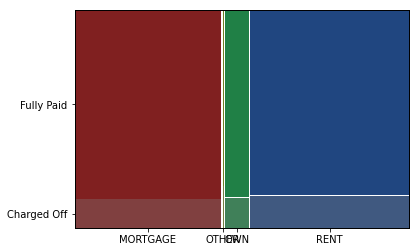

In [130]:
from bioinfokit import analys
analys.stat.chisq(pd.crosstab(loans_df['home_ownership'], loans_df['loan_status'], margins = False))

The P-value obtained from chi-square test for independence is significant (P<0.05), and therefore, we conclude that there is a significant association between **Home Ownership** with treatment **Loan Status**


Chi-squared test

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            6       1427.43  2.7887e-305
Log-likelihood     6       1417.13  4.72405e-303

Expected frequency counts

      Charged Off    Fully Paid
--  -------------  ------------
 0      1277.43        7862.57
 1      1497.98        9220.02
 2      1003.64        6177.36
 3       651.715       4011.28
 4       346.752       2134.25
 5       126.066        775.934
 6        39.4132       242.587


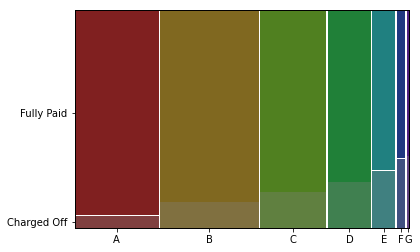

In [94]:
analys.stat.chisq(pd.crosstab(loans_df['grade'], loans_df['loan_status'], margins = False))


Chi-squared test

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            1       1133.82  1.47041e-248
Log-likelihood     1       1027.45  1.93852e-225

Expected frequency counts

      Charged Off    Fully Paid
--  -------------  ------------
 0        3686.53      22690.5
 1        1256.47       7733.53


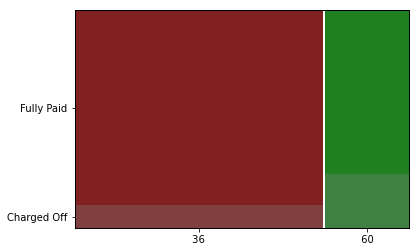

In [96]:
analys.stat.chisq(pd.crosstab(loans_df['term'], loans_df['loan_status'], margins = False))


Two sample ['Charged Off' 'Fully Paid'] t-test with unequal variance 

------------------  --------------
Mean diff              0.20045
t                      3.66402
Std Error              0.0547076
df                  6606.7
P-value (one-tail)     0.000125116
P-value (two-tail)     0.000250233
Lower 95.0%            0.0932051
Upper 95.0%            0.307694
------------------  -------------- 

Parameter estimates

Level          Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-----------  --------  -------  ---------  -----------  -------------  -------------
Charged Off      4943  5.15598    3.57338    0.0508258        5.05634        5.25562
Fully Paid      30424  4.95553    3.53035    0.0202399        4.91586        4.9952 



<Figure size 432x288 with 0 Axes>

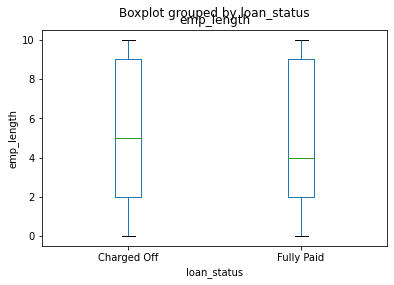

In [98]:
from bioinfokit.analys import get_data, stat
stat.ttsam(df=loans_df, xfac="loan_status", res="emp_length", evar=False)


Two sample ['Charged Off' 'Fully Paid'] t-test with unequal variance 

------------------  --------------
Mean diff           1340.42
t                     10.9989
Std Error            121.868
df                  6280.78
P-value (one-tail)     3.46945e-28
P-value (two-tail)     6.93889e-28
Lower 95.0%         1101.51
Upper 95.0%         1579.32
------------------  -------------- 

Parameter estimates

Level          Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-----------  --------  -------  ---------  -----------  -------------  -------------
Charged Off      4943  12286.1    8064.26     114.701         12061.3        12511
Fully Paid      30424  10945.7    7181.87      41.1746        10865          11026.4 



<Figure size 432x288 with 0 Axes>

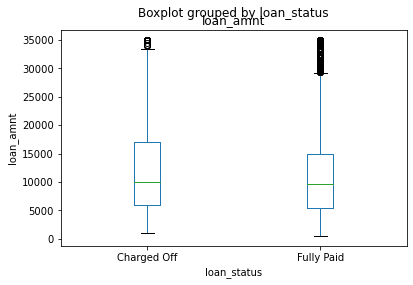

In [89]:
from bioinfokit.analys import get_data, stat
stat.ttsam(df=loans_df, xfac="loan_status", res="loan_amnt", evar=False)


Two sample ['Charged Off' 'Fully Paid'] t-test with unequal variance 

------------------  ---------------
Mean diff           -7063.75
t                      -9.12798
Std Error             773.857
df                   8433.11
P-value (one-tail)      4.30213e-20
P-value (two-tail)      8.60426e-20
Lower 95.0%         -8580.7
Upper 95.0%         -5546.8
------------------  --------------- 

Parameter estimates

Level          Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-----------  --------  -------  ---------  -----------  -------------  -------------
Charged Off      4943  63019.5    47410.9      674.346        61697.5        64341.5
Fully Paid      30424  70083.2    66215.5      379.622        69339.2        70827.3 



<Figure size 432x288 with 0 Axes>

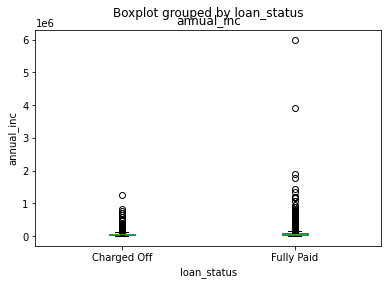

In [91]:
from bioinfokit.analys import get_data, stat
stat.ttsam(df=loans_df, xfac="loan_status", res="annual_inc", evar=False)


Two sample ['Charged Off' 'Fully Paid'] t-test with unequal variance 

------------------  ------------
Mean diff              2.26259
t                     40.5006
Std Error              0.0558654
df                  6616.5
P-value (one-tail)     0
P-value (two-tail)     0
Lower 95.0%            2.15307
Upper 95.0%            2.3721
------------------  ------------ 

Parameter estimates

Level          Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-----------  --------  -------  ---------  -----------  -------------  -------------
Charged Off      4943  13.9298    3.64762    0.0518817        13.8281        14.0315
Fully Paid      30424  11.6672    3.61373    0.020718         11.6266        11.7079 



<Figure size 432x288 with 0 Axes>

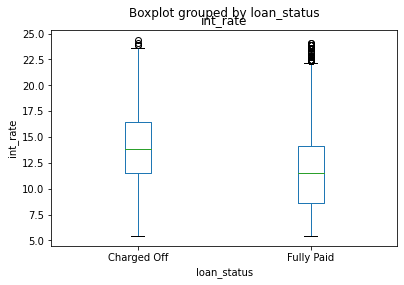

In [93]:
from bioinfokit.analys import get_data, stat
stat.ttsam(df=loans_df, xfac="loan_status", res="int_rate", evar=False)